In [1]:
import pandas as pd #for importing data

import json #for handling json data

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler #for scaling

from sklearn.preprocessing import LabelEncoder #for label encoding
from sklearn import preprocessing #for encoding

from sklearn.model_selection import train_test_split #for splitting the data

from sklearn.preprocessing import MultiLabelBinarizer #for encoding genres column

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier #XGB

from sklearn.metrics import accuracy_score,f1_score

from sklearn.linear_model import LinearRegression #for linear regression model
from sklearn.metrics import mean_squared_error #for checking model performance
from sklearn.tree import DecisionTreeRegressor #for decision tree algorithm
from sklearn import tree #to create tree
from sklearn.ensemble import RandomForestRegressor #for bagging
from sklearn.neighbors import KNeighborsRegressor #for KNN Algorithm
from sklearn.model_selection import KFold #to perform KFold
from sklearn.model_selection import GridSearchCV #to perform grid search
from sklearn.model_selection import cross_val_score #to get cross val score

from sklearn.linear_model import LogisticRegression #for logistic regression model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier #for decision tree
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing first data set

df1 = pd.read_csv('DS_C14_Capstone_tmdb_5000_credits.csv')
df1.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [3]:
#importing second data set

df2 = pd.read_csv('DS_C14_Capstone_tmdb_5000_movies.csv')
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
#shape of first data set

df1.shape

(4803, 4)

In [5]:
#shape of second data set

df2.shape

(4803, 18)

In [6]:
#columns in first data set

df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
#renaming 'movie_id' to 'id'

df1.rename(columns = {'movie_id' : 'id'},inplace=True)

In [8]:
#columns in second data set

df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [9]:
#merging both the data sets into one data frame

movie = pd.merge(df1,df2,on=['id'])

movie_reg = pd.merge(df1,df2,on=['id'])

In [10]:
movie.head(2)

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,overview,...,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [11]:
movie_reg.head(2)

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,overview,...,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [12]:
#shape of the dataframe

movie.shape

(4803, 21)

# Basic EDA

**Function to search null values in the data**

In [13]:
#function to find null values

null_details = {}
num = 0

def find_null():
        for i in movie.columns:
            num = movie[i].isnull().sum() #calculating the null value of the column
            if num>0:
                null_details[i]=num
        return null_details

**Function to perform basic EDA**

In [14]:
#function to perform basic eda steps

def basic_eda(df):
    
    #shape of the data set
    s = df.shape
    print('Shape of the data set',s)
    
    #columns present in the data set
    c = df.columns
    print('Columns present in the data set',c)
    
    #data types of all columns
    print('Data type of all columns present in the data set',df.dtypes)
    
    #value count of all columns
    print('Value count of all columns present in the data set')
    for i in df.columns:
        print(df[i].value_counts())
        
    #describing the data
    print('Describing the data')
    print(df.describe())
    
    #correaltion between the columns
    print('Correlation between the columns')
    print(df.corr())
    
    #function to check for null values
    d = find_null()
                
    print('Null value details',d)

In [15]:
basic_eda(movie)

Shape of the data set (4803, 21)
Columns present in the data set Index(['id', 'title_x', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'tagline', 'title_y', 'vote_average',
       'vote_count'],
      dtype='object')
Data type of all columns present in the data set id                        int64
title_x                  object
cast                     object
crew                     object
budget                    int64
genres                   object
homepage                 object
keywords                 object
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
status                   object
tagline     

In [16]:
print('*'*100)

****************************************************************************************************


**Handling JSON data**

In [17]:
movie.columns

Index(['id', 'title_x', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'tagline', 'title_y', 'vote_average',
       'vote_count'],
      dtype='object')

In [18]:
movie.head(2)

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,overview,...,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [19]:
movie.shape

(4803, 21)

In [20]:
#set to store all sorts of genres present in the data

#for regressor problem

genre_set = set()

for i in np.arange(4803):
    t = json.loads(movie_reg['genres'][i])
    for j in np.arange(len(t)):
        genre_set.add(t[j]['name'])

In [21]:
#creating columns for each gneres and filling its value as 0

#for regressor problem

for i in genre_set:
    val = [0]*movie_reg.shape[0]
    movie_reg.insert(movie_reg.shape[1],i,val)

In [22]:
# Handling JSON

#for regressor

j = ['genres','keywords','production_companies','production_countries']

for i in j:
    for k in np.arange(4803):
        item = json.loads(movie_reg[i][k])
        d = ''
        for l in np.arange(len(item)):
            if (d==""):
                d = d + item[l]['name']
            else:
                d = d + "," + item[l]['name']
        movie_reg[i][k] = d

In [23]:
# Handling JSON

#for classification

#j = ['genres','keywords','production_companies','production_countries']

for i in ['genres']:
    for k in np.arange(4803):
        item = json.loads(movie[i][k])
        d = []
        for l in np.arange(len(item)):
            d.append(item[l]['name'])
            #if (d==""):
                #d = d + item[l]['name']
            #else:
                #d = d + "," + item[l]['name']
        movie[i][k] = d

In [24]:
#for classification

j = ['keywords','production_companies','production_countries']

for i in j:
    for k in np.arange(4803):
        item = json.loads(movie[i][k])
        d = ""
        for l in np.arange(len(item)):
            if (d==""):
                d = d + item[l]['name']
            else:
                d = d + "," + item[l]['name']
        movie[i][k] = d

In [25]:
for i in ['Director','Producer','Writer']:
    
    #for classificcation data
    val1 = ['no data']*movie.shape[0]
    movie.insert(movie.shape[1],i,val1)
    
    #for regressor data
    val2 = ['no data']*movie.shape[0]
    movie_reg.insert(movie_reg.shape[1],i,val2)

In [26]:
#for classification data
for j in np.arange(4803):
        
        t = json.loads(movie['crew'][j])
        
        d = ''
        p = ''
        w = ''
        
        for k in np.arange(len(t)):
            
            job = t[k].get('job')
            
            if (job=='Director'):
                n = t[k].get('name')
                
                if (n!=''):
                    if (d==''):
                        d = d + n
                    else:
                        d = d + ',' + n
                
            if (job=='Producer'):
                n = t[k].get('name')
                
                if (n!=''):
                    if (p==''):
                        p = p + n
                    else:
                        p = p + ',' + n
                
    
            if (job=='Writer'):
                n = t[k].get('name')
                
                if (n!=''):
                    if (w==''):
                        w = w + n
                    else:
                        w = w + ',' + n
        
        
        
        
        movie['Writer'][j] = w
        
        if d=='':
            movie['Director'][j] = 'No Data'
        else:
            movie['Director'][j] = d
        
        
        if p=='':
            movie['Producer'][j] = 'No Data' 
        else:
            movie['Producer'][j] = p
        
        
        if w=='':
            movie['Writer'][j] = 'No Data' 
        else:
            movie['Writer'][j] = w

In [27]:
#for regressor data

for j in np.arange(4803):
        
        t = json.loads(movie_reg['crew'][j])
        
        d = ''
        p = ''
        w = ''
        
        for k in np.arange(len(t)):
            
            job = t[k].get('job')
            
            if (job=='Director'):
                n = t[k].get('name')
                
                if (n!=''):
                    if (d==''):
                        d = d + n
                    else:
                        d = d + ',' + n
                
            if (job=='Producer'):
                n = t[k].get('name')
                
                if (n!=''):
                    if (p==''):
                        p = p + n
                    else:
                        p = p + ',' + n
                
    
            if (job=='Writer'):
                n = t[k].get('name')
                
                if (n!=''):
                    if (w==''):
                        w = w + n
                    else:
                        w = w + ',' + n
        
        
        
        if d=='':
            movie_reg['Director'][j] = 'No Data'
        else:
            movie_reg['Director'][j] = d
        
        
        if p=='':
            movie_reg['Producer'][j] = 'No Data' 
        else:
            movie_reg['Producer'][j] = p
        
        
        if w=='':
            movie_reg['Writer'][j] = 'No Data' 
        else:
            movie_reg['Writer'][j] = w

In [28]:
for i in ['Actor','Actress']:
    
    #for classification data
    val1 = ['no data']*movie.shape[0]
    movie.insert(movie.shape[1],i,val1)
    
    #for regressor data
    val2 = ['no data']*movie_reg.shape[0]
    movie_reg.insert(movie_reg.shape[1],i,val2)

In [29]:
#for classification data

for j in np.arange(4803):
        
        t = json.loads(movie['cast'][j])
        
        actress = None
        actor = None
        
        for x in t:
            if x['gender'] == 1 and actress is None:
                actress = x['name']
                movie['Actress'][j] = actress
            elif x['gender'] == 2 and actor is None:
                actor = x['name']
                movie['Actor'][j] = actor      

In [30]:
#for regressor data

for j in np.arange(4803):
        
        t = json.loads(movie_reg['cast'][j])
        
        actress = None
        actor = None
        
        for x in t:
            if x['gender'] == 1 and actress is None:
                actress = x['name']
                movie_reg['Actress'][j] = actress
            elif x['gender'] == 2 and actor is None:
                actor = x['name']
                movie_reg['Actor'][j] = actor      

In [31]:
print('*'*100)

****************************************************************************************************


In [32]:
#for regressor

#setting 1 in respective genres as per their movies

for i in genre_set:
    for j in np.arange(movie_reg.shape[0]):
        if i in movie_reg['genres'][j]:
            movie_reg[i][j]=1;

# Null Value Treatment

In [33]:
movie.isnull().sum()

id                         0
title_x                    0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
status                     0
tagline                  844
title_y                    0
vote_average               0
vote_count                 0
Director                   0
Producer                   0
Writer                     0
Actor                      0
Actress                    0
dtype: int64

In [34]:
movie_reg.isnull().sum()

id                         0
title_x                    0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
status                     0
tagline                  844
title_y                    0
vote_average               0
vote_count                 0
Action                     0
Comedy                     0
Fantasy                    0
Drama                      0
Foreign                    0
Documentary                0
Western                    0
Animation                  0
Mystery                    0
Thriller                   0
TV Movie                   0
Romance                    0
Science Fiction            0
Horror        

Columns like homepage,overview and tagline will be dropped. Hence, not treating their null values.

In [35]:
#filling null values in runtime column

movie['runtime'].fillna(movie['runtime'].mean(),inplace=True)

movie_reg['runtime'].fillna(movie_reg['runtime'].mean(),inplace=True)

In [36]:
#filling null values in release_date column

movie['release_date'].fillna('Unknown', inplace=True)

movie_reg['release_date'].fillna('Unknown', inplace=True)

In [37]:
print('*'*100)

****************************************************************************************************


# Feature Selection

In [38]:
#dropping id,cast,crew,homepage,keywords,overview,tagline,'title_y'

for i in ['id','cast','crew','homepage','keywords','overview','tagline','title_y']:
    movie.drop(i, axis=1, inplace=True)
    movie_reg.drop(i, axis=1, inplace=True)

In [39]:
movie.shape

(4803, 18)

In [40]:
movie.columns

Index(['title_x', 'budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count',
       'Director', 'Producer', 'Writer', 'Actor', 'Actress'],
      dtype='object')

In [41]:
print('*'*100)

****************************************************************************************************


In [42]:
movie_clus = movie_reg.copy()

movie_rate = movie_reg.copy()

df1 = movie[['release_date','revenue']]

movie.to_csv('tableau.csv')

# Classification

In [43]:
#adding a column named as 'rating'

movie['rating'] = ['Good']*4803

#for i in np.arange(4803):
    #val = ['Good']*movie.shape[0]
    #movie.insert(movie.shape[1],i,val)

In [44]:
M = movie['vote_average'].mean()

In [45]:
#setting rating values as per the condition given

for i in ['rating']:
    for j in np.arange(4803):
        
        if movie['vote_average'][j] > M:
            movie[i][j]='Good';
            
        if (movie['vote_average'][j] >= M/2) and (movie['vote_average'][j] <= M) :
            movie[i][j]='Average';
        
        if movie['vote_average'][j] < M/2:
            movie[i][j]='Poor';

In [46]:
movie.columns

Index(['title_x', 'budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count',
       'Director', 'Producer', 'Writer', 'Actor', 'Actress', 'rating'],
      dtype='object')

In [47]:
movie.head(3)

,title_x,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,Director,Producer,Writer,Actor,Actress,rating
0,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",10-12-2009,2787965087,162.0,Released,7.2,11800,James Cameron,"James Cameron,Jon Landau",James Cameron,Sam Worthington,Zoe Saldana,Good
1,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,19-05-2007,961000000,169.0,Released,6.9,4500,Gore Verbinski,"Jerry Bruckheimer,Eric McLeod,Chad Oman,Peter ...",No Data,Johnny Depp,Keira Knightley,Good
2,Spectre,245000000,"[Action, Adventure, Crime]",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",26-10-2015,880674609,148.0,Released,6.3,4466,Sam Mendes,"Barbara Broccoli,Michael G. Wilson",No Data,Daniel Craig,Léa Seydoux,Good


In [48]:
#feature selection for predicting genre

for i in ['title_x','budget','runtime','revenue','release_date','rating','vote_average', 'vote_count','original_language','status',
          'production_companies', 'production_countries']:
    movie.drop(i, axis=1, inplace=True)

#feature selection for predicting genre

for i in ['title_x','runtime','revenue','release_date','rating','vote_average', 'vote_count','original_language','status']:
    movie.drop(i, axis=1, inplace=True)

**1. Classification for Genres Column**

**Scaling for numerical columns**

In [49]:
movie.columns

Index(['genres', 'popularity', 'Director', 'Producer', 'Writer', 'Actor',
       'Actress'],
      dtype='object')

numerical = ['budget','popularity']

In [50]:
scaler = StandardScaler()

for i in ['popularity']:
    movie[i] = pd.DataFrame(scaler.fit_transform(movie[i].to_numpy().reshape(-1,1)),columns=[i])

In [51]:
movie.head(3)

,genres,popularity,Director,Producer,Writer,Actor,Actress
0,"[Action, Adventure, Fantasy, Science Fiction]",4.053183,James Cameron,"James Cameron,Jon Landau",James Cameron,Sam Worthington,Zoe Saldana
1,"[Adventure, Fantasy, Action]",3.696258,Gore Verbinski,"Jerry Bruckheimer,Eric McLeod,Chad Oman,Peter ...",No Data,Johnny Depp,Keira Knightley
2,"[Action, Adventure, Crime]",2.699638,Sam Mendes,"Barbara Broccoli,Michael G. Wilson",No Data,Daniel Craig,Léa Seydoux


**Label Encoding for columns other than target column(genres)**

In [52]:
movie.columns

Index(['genres', 'popularity', 'Director', 'Producer', 'Writer', 'Actor',
       'Actress'],
      dtype='object')

In [53]:
label_columns = ['Director', 'Producer', 'Writer', 'Actor', 'Actress']

In [54]:
for i in label_columns:
    movie[i] = movie[i].astype("category")

In [55]:
encoder = preprocessing.LabelEncoder()

In [56]:
for i in label_columns:
    movie[i] = encoder.fit_transform(movie[i])

In [57]:
movie.head(3)

,genres,popularity,Director,Producer,Writer,Actor,Actress
0,"[Action, Adventure, Fantasy, Science Fiction]",4.053183,918,1296,530,1533,1924
1,"[Adventure, Fantasy, Action]",3.696258,799,1414,978,908,987
2,"[Action, Adventure, Crime]",2.699638,2029,257,978,382,1196


In [58]:
x = movie.loc[:,['popularity','Director', 'Producer', 'Writer', 'Actor', 'Actress']]

In [59]:
x

,popularity,Director,Producer,Writer,Actor,Actress
0,4.053183,918,1296,530,1533,1924
1,3.696258,799,1414,978,908,987
2,2.699638,2029,257,978,382,1196
3,2.854798,376,514,978,300,140
4,0.705198,97,648,978,1661,1189
...,...,...,...,...,...,...
4798,-0.227028,1948,2586,978,237,1931
4799,-0.655378,629,904,381,518,1003
4800,-0.630170,2055,1194,856,544,1037
4801,-0.648637,458,2265,277,385,490


In [60]:
y = movie['genres']

In [61]:
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [62]:
mlb = MultiLabelBinarizer()

In [63]:
y_train_mlb = mlb.fit_transform(y_train)

y_test_mlb = mlb.fit_transform(y_test)

In [64]:
x_train

,popularity,Director,Producer,Writer,Actor,Actress
4687,-0.614329,1440,1359,978,784,1243
2951,0.466059,1068,1464,611,1304,284
4071,0.622582,2212,56,978,1555,1169
4579,1.360772,2217,1945,1277,633,385
2197,-0.071401,1455,2265,978,281,125
...,...,...,...,...,...,...
4426,-0.655007,1185,2265,978,1091,1101
466,0.141018,2101,797,978,640,1520
3092,-0.204723,582,2265,358,421,436
3772,-0.484085,1090,475,978,137,1857


In [65]:
y_train_mlb

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Model Building**

In [66]:
#with SVC

clf = OneVsRestClassifier(SVC()).fit(x_train, y_train_mlb)

#training score of the model
svc_tr_score = clf.score(x_train,y_train_mlb)*100

y_pred_svc = clf.predict(x_test)

#testing score
#svc_te_score = accuracy_score(y_test_mlb,y_pred_svc)*100

svc_te_score = f1_score(y_test_mlb, y_pred_svc,average='micro')*100

In [67]:
svc_te_score

9.150805270863836

In [68]:
#testing score

scv_tr = clf.score(x_train,y_train_mlb)

In [69]:
scv_tr

0.03045288912024987

In [70]:
#with random forest classifier
rfc = RandomForestClassifier()

ovr_rfc = OneVsRestClassifier(rfc)

ovr_rfc.fit(x_train, y_train_mlb)

y_pred_rfc = ovr_rfc.predict(x_test)


#accuracy = accuracy_score(y_test_mlb, y_pred_rfc)*100

rfc_score = f1_score(y_test_mlb, y_pred_rfc,average='micro')*100
print("Performance:", rfc_score)

Performance: 27.050448777468272


In [71]:
#testing score

rfc_tr = ovr_rfc.score(x_train,y_train_mlb)

In [72]:
rfc_tr

0.9992191566892243

In [73]:
#with gaussianNB
nb = GaussianNB()

nb_ovr = OneVsRestClassifier(nb)

nb_ovr.fit(x_train, y_train_mlb)

y_pred_nb = nb_ovr.predict(x_test)

nb_tr = nb_ovr.score(x_train,y_train_mlb)*100

print('Trainig Score',nb_tr)

print('Testing Score:',(f1_score(y_test_mlb, y_pred_nb,average='micro')*100))

Trainig Score 7.287870900572618
Testing Score: 27.633457036825575


In [74]:
#with gradient boosting classifier

gb = GradientBoostingClassifier()

gb_ovr = OneVsRestClassifier(gb)

gb_ovr.fit(x_train, y_train_mlb)

gb_tr = gb_ovr.score(x_train,y_train_mlb)*100
y_pred3 = gb_ovr.predict(x_test)

print('Training Score:',gb_tr)
print('Testing Score:',(f1_score(y_test_mlb, y_pred3,average='micro')*100))

Training Score: 12.831858407079647
Testing Score: 24.40720834650648


In [75]:
from sklearn.ensemble import AdaBoostClassifier #for ada boosting

In [76]:
ad = AdaBoostClassifier()

In [77]:
ad_ovr = OneVsRestClassifier(ad)

ad_ovr.fit(x_train, y_train_mlb)

y_pred4 = ad_ovr.predict(x_test)

print('Performance:',(f1_score(y_test_mlb, y_pred4,average='micro')*100))

Performance: 22.747603833865814


In [78]:
ad_tr = ad_ovr.score(x_train,y_train_mlb)*100

print('Training Score:',ad_tr)

Training Score: 7.131702238417491


# Regressor(Revenue Prediction)

**Scaling**

In [79]:
movie_reg['rating'] = ['Good']*4803
movie_clus['rating'] = ['Good']*4803

#setting rating values as per the condition given

for i in ['rating']:
    for j in np.arange(4803):
        
        if movie_reg['vote_average'][j] > M:
            movie_reg[i][j]='Good';
            movie_clus[i][j]='Good';
            
        if (movie_reg['vote_average'][j] >= M/2) and (movie_reg['vote_average'][j] <= M) :
            movie_reg[i][j]='Average';
            movie_clus[i][j]='Average';
        
        if movie_reg['vote_average'][j] < M/2:
            movie_reg[i][j]='Poor';
            movie_clus[i][j]='Poor';

In [80]:
movie_reg.columns

Index(['title_x', 'budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'Action',
       'Comedy', 'Fantasy', 'Drama', 'Foreign', 'Documentary', 'Western',
       'Animation', 'Mystery', 'Thriller', 'TV Movie', 'Romance',
       'Science Fiction', 'Horror', 'War', 'Family', 'History', 'Music',
       'Crime', 'Adventure', 'Director', 'Producer', 'Writer', 'Actor',
       'Actress', 'rating'],
      dtype='object')

In [81]:
temp = movie_reg.copy()

In [82]:
temp.columns

Index(['title_x', 'budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'Action',
       'Comedy', 'Fantasy', 'Drama', 'Foreign', 'Documentary', 'Western',
       'Animation', 'Mystery', 'Thriller', 'TV Movie', 'Romance',
       'Science Fiction', 'Horror', 'War', 'Family', 'History', 'Music',
       'Crime', 'Adventure', 'Director', 'Producer', 'Writer', 'Actor',
       'Actress', 'rating'],
      dtype='object')

#feature selection for revenue prediction

for i in ['title_x','original_language','runtime','vote_count','status','genres','release_date',
          'production_companies','production_countries']:
    temp.drop(i,axis=1,inplace=True)

In [83]:
temp.columns

Index(['title_x', 'budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'Action',
       'Comedy', 'Fantasy', 'Drama', 'Foreign', 'Documentary', 'Western',
       'Animation', 'Mystery', 'Thriller', 'TV Movie', 'Romance',
       'Science Fiction', 'Horror', 'War', 'Family', 'History', 'Music',
       'Crime', 'Adventure', 'Director', 'Producer', 'Writer', 'Actor',
       'Actress', 'rating'],
      dtype='object')

In [84]:
temp.drop('release_date',axis=1,inplace=True)

In [85]:
temp.columns

Index(['title_x', 'budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'revenue', 'runtime',
       'status', 'vote_average', 'vote_count', 'Action', 'Comedy', 'Fantasy',
       'Drama', 'Foreign', 'Documentary', 'Western', 'Animation', 'Mystery',
       'Thriller', 'TV Movie', 'Romance', 'Science Fiction', 'Horror', 'War',
       'Family', 'History', 'Music', 'Crime', 'Adventure', 'Director',
       'Producer', 'Writer', 'Actor', 'Actress', 'rating'],
      dtype='object')

In [86]:
numerical2 = ['popularity', 'vote_average','budget','revenue','runtime','vote_count']

In [87]:
scaler2 = StandardScaler()

for i in numerical2:
    temp[i] = pd.DataFrame(scaler2.fit_transform(temp[i].to_numpy().reshape(-1,1)),columns=[i])

**Label Encoding**

In [88]:
temp.columns

Index(['title_x', 'budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'revenue', 'runtime',
       'status', 'vote_average', 'vote_count', 'Action', 'Comedy', 'Fantasy',
       'Drama', 'Foreign', 'Documentary', 'Western', 'Animation', 'Mystery',
       'Thriller', 'TV Movie', 'Romance', 'Science Fiction', 'Horror', 'War',
       'Family', 'History', 'Music', 'Crime', 'Adventure', 'Director',
       'Producer', 'Writer', 'Actor', 'Actress', 'rating'],
      dtype='object')

In [89]:
temp.drop('genres',axis=1,inplace=True)

In [90]:
temp.columns

Index(['title_x', 'budget', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'revenue', 'runtime',
       'status', 'vote_average', 'vote_count', 'Action', 'Comedy', 'Fantasy',
       'Drama', 'Foreign', 'Documentary', 'Western', 'Animation', 'Mystery',
       'Thriller', 'TV Movie', 'Romance', 'Science Fiction', 'Horror', 'War',
       'Family', 'History', 'Music', 'Crime', 'Adventure', 'Director',
       'Producer', 'Writer', 'Actor', 'Actress', 'rating'],
      dtype='object')

In [91]:
for i in ['title_x','original_language','production_companies', 'production_countries',
          'status','rating','Director','Producer','Writer','Actor','Actress']:
    temp[i] = temp[i].astype("category")

encoder2 = preprocessing.LabelEncoder()

for i in ['title_x','original_language','production_companies', 'production_countries',
          'status','rating','Director','Producer','Writer','Actor','Actress']:
    temp[i] = encoder2.fit_transform(temp[i])

In [92]:
temp.columns

Index(['title_x', 'budget', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'revenue', 'runtime',
       'status', 'vote_average', 'vote_count', 'Action', 'Comedy', 'Fantasy',
       'Drama', 'Foreign', 'Documentary', 'Western', 'Animation', 'Mystery',
       'Thriller', 'TV Movie', 'Romance', 'Science Fiction', 'Horror', 'War',
       'Family', 'History', 'Music', 'Crime', 'Adventure', 'Director',
       'Producer', 'Writer', 'Actor', 'Actress', 'rating'],
      dtype='object')

In [93]:
temp.head(3)

,title_x,budget,original_language,popularity,production_companies,production_countries,revenue,runtime,status,vote_average,...,History,Music,Crime,Adventure,Director,Producer,Writer,Actor,Actress,rating
0,379,5.107181,7,4.053183,1392,465,16.615709,2.438596,1,0.927451,...,0,0,0,1,918,1296,530,1533,1924,1
1,2648,6.654402,7,3.696258,3539,418,5.396331,2.748263,1,0.676297,...,0,0,0,1,799,1414,978,908,987,1
2,3181,5.303653,7,2.699638,527,404,4.903054,1.819260,1,0.173990,...,0,0,1,1,2029,257,978,382,1196,1


In [94]:
x2 = temp.loc[:,['title_x', 'budget', 'original_language', 'popularity',
       'production_companies', 'production_countries','runtime',
       'status', 'vote_average', 'vote_count', 'Action', 'Comedy', 'Fantasy',
       'Drama', 'Foreign', 'Documentary', 'Western', 'Animation', 'Mystery',
       'Thriller', 'TV Movie', 'Romance', 'Science Fiction', 'Horror', 'War',
       'Family', 'History', 'Music', 'Crime', 'Adventure', 'Director',
       'Producer', 'Writer', 'Actor', 'Actress', 'rating']]

In [95]:
y2 = temp['revenue']

In [96]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2, test_size=0.2,random_state=42)

**Model Building**

**1. Linear Regressor**

In [97]:
#build the model
lin = LinearRegression()

#train the model
lin.fit(x2_train,y2_train)

#training performance of model
lin_score_tr = lin.score(x2_train,y2_train)

#predicting with model
y_pred_lin = lin.predict(x2_test)

#testing performance of model
lin_score_te = mean_squared_error(y2_test,y_pred_lin)

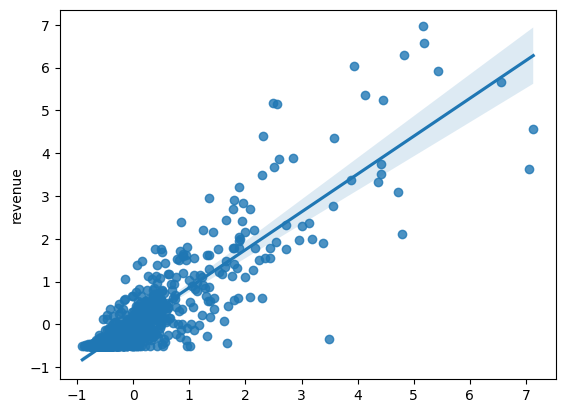

In [98]:
#visualise the data
sns.regplot(x=y_pred_lin,y=y2_test)
plt.show()

**2. Decision Tree Regressor**

In [99]:
d = [2,3,4,5,6,7,11,15,17,20,21,25,27,29,35,43,80]

for i in d:
    dfr = DecisionTreeRegressor(max_depth=i)
    dfr.fit(x2_train,y2_train)
    y_pred = dfr.predict(x2_test)
    mse = mean_squared_error(y2_test,y_pred)
    print(i,'has mse of',mse)

2 has mse of 0.35228008940456107
3 has mse of 0.5002815959318467
4 has mse of 0.30490548953575597
5 has mse of 0.4126327464107731
6 has mse of 0.28573940788021573
7 has mse of 0.37888401803792576
11 has mse of 0.8184270851541349
15 has mse of 0.7159856884687749
17 has mse of 0.46041867771248973
20 has mse of 0.613163535471002
21 has mse of 0.4773147855583775
25 has mse of 0.5987562744569758
27 has mse of 0.8442912311614958
29 has mse of 0.6011146951497287
35 has mse of 0.597450629140754
43 has mse of 0.4512681420996937
80 has mse of 0.6989759204268216


In [100]:
#final dfr model

#build the model
dfr_final = DecisionTreeRegressor(max_depth=6)

#fit the model
dfr_final.fit(x2_train,y2_train)

#training performance of the model
dfr_score_tr = dfr_final.score(x2_train,y2_train)

#prediction with the model
y_pred_dfr = dfr_final.predict(x2_test)

#testing performance of the model
dfr_score_te = mean_squared_error(y2_test,y_pred_dfr)

In [101]:
print('Linear Regression-')
print('Training Score',lin_score_tr*100)
print('Testing Score',lin_score_te*100)

print('*'*100)

print('Decision Tree Regressor-')
print('Training Score',dfr_score_tr*100)
print('Testing Score',dfr_score_te*100)

Linear Regression-
Training Score 72.7490117238897
Testing Score 23.236612556581342
****************************************************************************************************
Decision Tree Regressor-
Training Score 83.95951594029076
Testing Score 43.69225278878533


**3.Random Forest Regressor**

In [102]:
#build the model
rf = RandomForestRegressor(oob_score=True)

#train the model
rf.fit(x2_train,y2_train)

#training performance of the model
rf_score_tr = rf.score(x2_train,y2_train)

#predicting with the model
y_pred_rf = rf.predict(x2_test)

#testing performance of the model
rf_score_te = mean_squared_error(y_pred_rf,y2_test)

In [103]:
print('Random Forest Regressor-')
print('Training Score',rf_score_tr*100)
print('Testing Score',rf_score_te*100)

Random Forest Regressor-
Training Score 96.35360401181549
Testing Score 21.459483822588226


**Hyper Parameter Tuning to get the best performing model**

In [104]:
kf = KFold(n_splits=3)

In [105]:
param = {
    "max_depth" : [5,10,15,20,25,30],
    "n_estimators" : [5,25,50,70,80]
}

In [106]:
grid_search = GridSearchCV(rf,param_grid=param,cv=kf,scoring='neg_mean_squared_error')
grid_search.fit(x2_train,y2_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(oob_score=True),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'n_estimators': [5, 25, 50, 70, 80]},
             scoring='neg_mean_squared_error')

In [107]:
#getting best parameters
grid_search.best_estimator_

RandomForestRegressor(max_depth=25, n_estimators=50, oob_score=True)

In [109]:
#preparing the best model
rf_best = RandomForestRegressor(max_depth=25,n_estimators=50,oob_score=True)

#train that model
rf_best.fit(x2_train,y2_train)

RandomForestRegressor(max_depth=25, n_estimators=50, oob_score=True)

In [110]:
#cross val score
rf_best_score = cross_val_score(rf_best,x2,y2,cv=kf,scoring='neg_mean_squared_error').mean()

In [111]:
print('Best model on Random Forest Regressor score is',rf_best_score)

Best model on Random Forest Regressor score is -0.5030438904622994


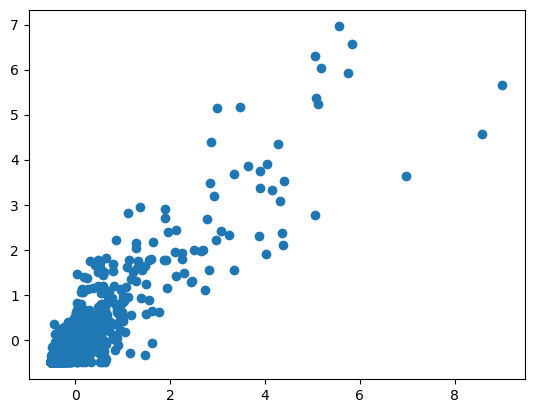

In [112]:
#prediction with the model
y_pred_rfbest = rf_best.predict(x2_test)

#training and testing performance
rf_best_tr = rf_best.score(x2_train,y2_train)

rf_best_te = mean_squared_error(y_pred_rfbest,y2_test)

#visualise the points
plt.scatter(y_pred_rfbest,y2_test)
plt.show()

In [113]:
print('Random Forest Regressor after grid search-')
print('Training Score',rf_best_tr*100)
print('Testing Score',rf_best_te*100)

Random Forest Regressor after grid search-
Training Score 96.05967759943613
Testing Score 20.07514537356959


**4. KNN Algorithm**

In [114]:
#choosing k
k = int(round(len(x2_train)**0.5,0))

#build the model
knn = KNeighborsRegressor(n_neighbors=k)

#train the model
knn.fit(x2_train,y2_train)

#training performance of model
knn_score_tr = knn.score(x2_train,y2_train)

#predicting with the model
y_pred_knn = knn.predict(x2_test)

#testing performance of the model
knn_score_te = mean_squared_error(y2_test,y_pred_knn)

In [262]:
rmse_knn = mean_squared_error(y2_test,y_pred_knn,squared=False)

In [263]:
rmse_knn

0.9791497750140301

**Score of different models**

In [115]:
print('Linear Regression-')
print('Training Score',lin_score_tr)
print('Testing Score',lin_score_te)

print('*'*100)

print('Decision Tree Regressor-')
print('Training Score',dfr_score_tr)
print('Testing Score',dfr_score_te)


print('*'*100)

print('Random Forest Regressor-')
print('Training Score',rf_best_tr)
print('Testing Score',rf_best_te)

print('*'*100)

print('KNN Neighbor Regressor-')
print('Training Score',knn_score_tr)
print('Testing Score',knn_score_te)

Linear Regression-
Training Score 0.727490117238897
Testing Score 0.23236612556581343
****************************************************************************************************
Decision Tree Regressor-
Training Score 0.8395951594029076
Testing Score 0.43692252788785335
****************************************************************************************************
Random Forest Regressor-
Training Score 0.9605967759943612
Testing Score 0.20075145373569592
****************************************************************************************************
KNN Neighbor Regressor-
Training Score 0.06581290950155516
Testing Score 0.9587342819100257


In [116]:
from sklearn.ensemble import AdaBoostRegressor

In [117]:
adr = AdaBoostRegressor()

In [118]:
adr.fit(x2_train, y2_train)

y_pred_reg = adr.predict(x2_test)

print('Performance:',(mean_squared_error(y2_test,y_pred_reg))*100)

Performance: 50.196042557885875


**2. Classification for movie rating prediction**

In [119]:
movie_reg.columns

Index(['title_x', 'budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'Action',
       'Comedy', 'Fantasy', 'Drama', 'Foreign', 'Documentary', 'Western',
       'Animation', 'Mystery', 'Thriller', 'TV Movie', 'Romance',
       'Science Fiction', 'Horror', 'War', 'Family', 'History', 'Music',
       'Crime', 'Adventure', 'Director', 'Producer', 'Writer', 'Actor',
       'Actress', 'rating'],
      dtype='object')

In [120]:
movie_reg.head(3)

,title_x,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,...,History,Music,Crime,Adventure,Director,Producer,Writer,Actor,Actress,rating
0,Avatar,237000000,"Action,Adventure,Fantasy,Science Fiction",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",10-12-2009,2787965087,162.0,...,0,0,0,1,James Cameron,"James Cameron,Jon Landau",James Cameron,Sam Worthington,Zoe Saldana,Good
1,Pirates of the Caribbean: At World's End,300000000,"Adventure,Fantasy,Action",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,19-05-2007,961000000,169.0,...,0,0,0,1,Gore Verbinski,"Jerry Bruckheimer,Eric McLeod,Chad Oman,Peter ...",No Data,Johnny Depp,Keira Knightley,Good
2,Spectre,245000000,"Action,Adventure,Crime",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",26-10-2015,880674609,148.0,...,0,0,1,1,Sam Mendes,"Barbara Broccoli,Michael G. Wilson",No Data,Daniel Craig,Léa Seydoux,Good


**Splitting the data**

In [121]:
movie_reg.columns

Index(['title_x', 'budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'Action',
       'Comedy', 'Fantasy', 'Drama', 'Foreign', 'Documentary', 'Western',
       'Animation', 'Mystery', 'Thriller', 'TV Movie', 'Romance',
       'Science Fiction', 'Horror', 'War', 'Family', 'History', 'Music',
       'Crime', 'Adventure', 'Director', 'Producer', 'Writer', 'Actor',
       'Actress', 'rating'],
      dtype='object')

In [122]:
movie_reg.head(3)

,title_x,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,...,History,Music,Crime,Adventure,Director,Producer,Writer,Actor,Actress,rating
0,Avatar,237000000,"Action,Adventure,Fantasy,Science Fiction",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",10-12-2009,2787965087,162.0,...,0,0,0,1,James Cameron,"James Cameron,Jon Landau",James Cameron,Sam Worthington,Zoe Saldana,Good
1,Pirates of the Caribbean: At World's End,300000000,"Adventure,Fantasy,Action",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,19-05-2007,961000000,169.0,...,0,0,0,1,Gore Verbinski,"Jerry Bruckheimer,Eric McLeod,Chad Oman,Peter ...",No Data,Johnny Depp,Keira Knightley,Good
2,Spectre,245000000,"Action,Adventure,Crime",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",26-10-2015,880674609,148.0,...,0,0,1,1,Sam Mendes,"Barbara Broccoli,Michael G. Wilson",No Data,Daniel Craig,Léa Seydoux,Good


for i in ['title_x','budget','genres','original_language','release_date','runtime','production_countries',
         'Actor','Actress','status','vote_count']:
    movie_reg.drop(i,axis=1,inplace=True)

In [123]:
for i in ['title_x','genres','release_date','production_countries']:
    movie_reg.drop(i,axis=1,inplace=True)

In [124]:
movie_reg.columns

Index(['budget', 'original_language', 'popularity', 'production_companies',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'Action',
       'Comedy', 'Fantasy', 'Drama', 'Foreign', 'Documentary', 'Western',
       'Animation', 'Mystery', 'Thriller', 'TV Movie', 'Romance',
       'Science Fiction', 'Horror', 'War', 'Family', 'History', 'Music',
       'Crime', 'Adventure', 'Director', 'Producer', 'Writer', 'Actor',
       'Actress', 'rating'],
      dtype='object')

In [125]:
en = preprocessing.LabelEncoder()

for i in ['original_language','production_companies','status','Director', 'Producer','Actor',
       'Actress','Writer','rating']:
    movie_reg[i] = en.fit_transform(movie_reg[i])

In [127]:
movie_reg.head(3)

,budget,original_language,popularity,production_companies,revenue,runtime,status,vote_average,vote_count,Action,...,History,Music,Crime,Adventure,Director,Producer,Writer,Actor,Actress,rating
0,237000000,7,150.437577,1392,2787965087,162.0,1,7.2,11800,1,...,0,0,0,1,918,1296,530,1533,1924,1
1,300000000,7,139.082615,3539,961000000,169.0,1,6.9,4500,1,...,0,0,0,1,799,1414,978,908,987,1
2,245000000,7,107.376788,527,880674609,148.0,1,6.3,4466,1,...,0,0,1,1,2029,257,978,382,1196,1


In [128]:
movie_reg.columns

Index(['budget', 'original_language', 'popularity', 'production_companies',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'Action',
       'Comedy', 'Fantasy', 'Drama', 'Foreign', 'Documentary', 'Western',
       'Animation', 'Mystery', 'Thriller', 'TV Movie', 'Romance',
       'Science Fiction', 'Horror', 'War', 'Family', 'History', 'Music',
       'Crime', 'Adventure', 'Director', 'Producer', 'Writer', 'Actor',
       'Actress', 'rating'],
      dtype='object')

In [129]:
sc2 = StandardScaler()

for i in ['budget','popularity','revenue', 'runtime','vote_average', 'vote_count']:
    movie_reg[i] = pd.DataFrame(sc2.fit_transform(movie_reg[i].to_numpy().reshape(-1,1)),columns=[i])

In [130]:
x3 = movie_reg.loc[:,['budget', 'original_language', 'popularity', 'production_companies',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'Action',
       'Comedy', 'Fantasy', 'Drama', 'Foreign', 'Documentary', 'Western',
       'Animation', 'Mystery', 'Thriller', 'TV Movie', 'Romance',
       'Science Fiction', 'Horror', 'War', 'Family', 'History', 'Music',
       'Crime', 'Adventure', 'Director', 'Producer', 'Writer', 'Actor',
       'Actress']]

x3 = movie_reg.loc[:,['title_x', 'budget', 'original_language', 'popularity',
       'production_companies', 'production_countries',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'War',
       'Horror', 'Foreign', 'Documentary', 'Music', 'Action', 'Fantasy',
       'History', 'Animation', 'Mystery', 'Comedy', 'Family', 'TV Movie',
       'Science Fiction', 'Thriller', 'Drama', 'Romance', 'Western',
       'Adventure', 'Crime', 'Director', 'Producer', 'Writer', 'Actor',
       'Actress']].values

In [131]:
y3 = movie_reg['rating']

In [132]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3, test_size=0.2,random_state=42)

**Model Builiding**

**1. Logistic Regressor**

In [133]:
#build the model
log_reg = LogisticRegression(max_iter=1000)

#train the model
log_reg.fit(x3_train,y3_train)

#training performance of the model
log_reg_tr = log_reg.score(x3_train,y3_train)*100

#predict with the model
y_pred_log = log_reg.predict(x3_test)

#testing performance of the model
log_reg_te = f1_score(y3_test,y_pred_log,average='weighted')*100 #f1 score becaue the data is un-balanced

In [134]:
print('Logistic Regression-')
print('Training Score:',log_reg_tr)
print('Testing Score:',log_reg_te)

Logistic Regression-
Training Score: 94.1697032795419
Testing Score: 92.94248959747743


**2. Decision Tree Classifier**

In [135]:
for i in [2,3,4,5,6,7,8,15,20]:
    temp = DecisionTreeClassifier(max_depth=i)
    temp.fit(x3_train,y3_train)
    pred = temp.predict(x3_test)
    print('With',i,'depth, it has performance of',f1_score(y3_test,pred,average='weighted')*100)

With 2 depth, it has performance of 100.0
With 3 depth, it has performance of 100.0
With 4 depth, it has performance of 100.0
With 5 depth, it has performance of 100.0
With 6 depth, it has performance of 100.0
With 7 depth, it has performance of 100.0
With 8 depth, it has performance of 100.0
With 15 depth, it has performance of 100.0
With 20 depth, it has performance of 100.0


In [136]:
#build the model
dfc = DecisionTreeClassifier(max_depth=4)

#fit the model
dfc.fit(x3_train,y3_train)

#training score of the model
dfc_tr = dfc.score(x3_train,y3_train)*100

#predict with the model
y_pred_dfc = dfc.predict(x3_test)

#testing performance of the model
dfc_te = f1_score(y3_test,y_pred_dfc,average='weighted')*100

In [137]:
print('Logistic Regression-')
print('Training Score:',log_reg_tr)
print('Testing Score:',log_reg_te)
print('Decision Tree Classifier-')
print('Training Score:',dfc_tr)
print('Testing Score:',dfc_te)

Logistic Regression-
Training Score: 94.1697032795419
Testing Score: 92.94248959747743
Decision Tree Classifier-
Training Score: 100.0
Testing Score: 100.0


**3. Random Forest Classifier**

In [138]:
rf = RandomForestClassifier(oob_score=True)

rf.fit(x3_train,y3_train)

rskf = RepeatedStratifiedKFold(n_splits=3)

Hyper parameter Tuning

In [139]:
param = {
    'max_depth':[15,20,25],
    'criterion': ['gini','entropy'],
    'n_estimators':[50,70]
}

In [140]:
grid_search = GridSearchCV(rf,param_grid=param,cv=rskf,scoring='f1_weighted')

grid_search.fit(x3_train,y3_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 25], 'n_estimators': [50, 70]},
             scoring='f1_weighted')

In [141]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=25, n_estimators=70, oob_score=True)

In [142]:
rf_best = RandomForestClassifier(criterion='entropy',max_depth=25,n_estimators=70,oob_score=True)

In [143]:
rf_best.fit(x3_train,y3_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=70,
                       oob_score=True)

In [144]:
rf_best.oob_score_

0.9942738157209786

In [145]:
rb_tr = rf_best.score(x3_train,y3_train)*100
rb_tr

100.0

In [146]:
rfc_score = cross_val_score(rf_best,x3,y3,cv=rskf,scoring="f1_weighted").mean()

In [147]:
print('Logistic Regression-')
print('Training Score:',log_reg_tr)
print('Testing Score:',log_reg_te)
print('*'*100)
print('Decision Tree Classifier-')
print('Training Score:',dfc_tr)
print('Testing Score:',dfc_te)
print('*'*100)
print('Random Forest Classifier-')
print('Training Score:',rb_tr)
print('Testing Score:',rfc_score)

Logistic Regression-
Training Score: 94.1697032795419
Testing Score: 92.94248959747743
****************************************************************************************************
Decision Tree Classifier-
Training Score: 100.0
Testing Score: 100.0
****************************************************************************************************
Random Forest Classifier-
Training Score: 100.0
Testing Score: 0.9947989838509111


# Clustering

In [148]:
movie_clus.head(3)

,title_x,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,...,History,Music,Crime,Adventure,Director,Producer,Writer,Actor,Actress,rating
0,Avatar,237000000,"Action,Adventure,Fantasy,Science Fiction",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",10-12-2009,2787965087,162.0,...,0,0,0,1,James Cameron,"James Cameron,Jon Landau",James Cameron,Sam Worthington,Zoe Saldana,Good
1,Pirates of the Caribbean: At World's End,300000000,"Adventure,Fantasy,Action",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,19-05-2007,961000000,169.0,...,0,0,0,1,Gore Verbinski,"Jerry Bruckheimer,Eric McLeod,Chad Oman,Peter ...",No Data,Johnny Depp,Keira Knightley,Good
2,Spectre,245000000,"Action,Adventure,Crime",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",26-10-2015,880674609,148.0,...,0,0,1,1,Sam Mendes,"Barbara Broccoli,Michael G. Wilson",No Data,Daniel Craig,Léa Seydoux,Good


In [149]:
movie_clus.columns

Index(['title_x', 'budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'Action',
       'Comedy', 'Fantasy', 'Drama', 'Foreign', 'Documentary', 'Western',
       'Animation', 'Mystery', 'Thriller', 'TV Movie', 'Romance',
       'Science Fiction', 'Horror', 'War', 'Family', 'History', 'Music',
       'Crime', 'Adventure', 'Director', 'Producer', 'Writer', 'Actor',
       'Actress', 'rating'],
      dtype='object')

In [248]:
from matplotlib.ticker import ScalarFormatter

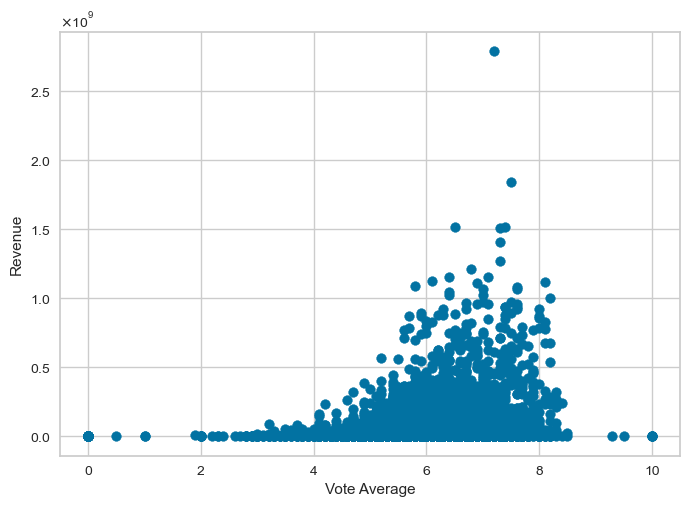

In [249]:
plt.scatter(movie_clus['vote_average'],movie_clus['revenue'])
plt.xlabel('Vote Average')
plt.ylabel('Revenue')

ax = plt.gca()

formatter = ScalarFormatter(useMathText=True)
ax.yaxis.set_major_formatter(formatter)


plt.show()

In [151]:
#removing negative values of average vote

mean_vote = movie_clus[movie_clus['vote_average'] >= 0]['vote_average'].mean()
movie_clus['vote_average'] = movie_clus['vote_average'].apply(lambda x: mean_vote if x < 0 else x)

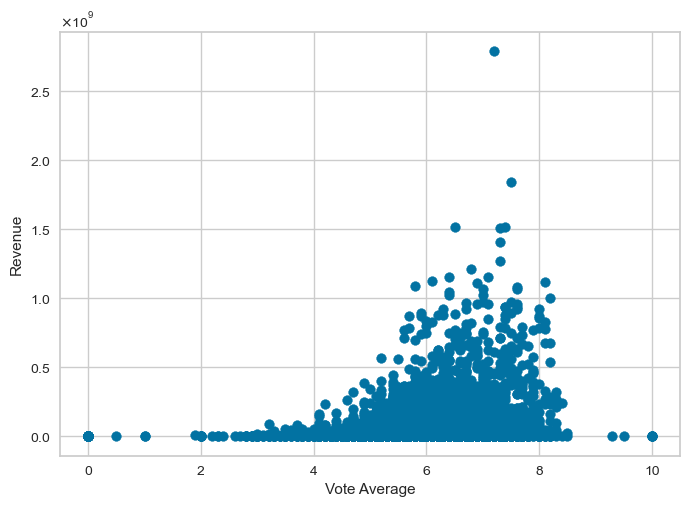

In [251]:
plt.scatter(movie_clus['vote_average'],movie_clus['revenue'])
plt.xlabel('Vote Average')
plt.ylabel('Revenue')

ax2 = plt.gca()

formatter2 = ScalarFormatter(useMathText=True)
ax2.yaxis.set_major_formatter(formatter2)

plt.show()

In [153]:
c = movie_clus.loc[:,['vote_average','revenue']]

In [154]:
c

,vote_average,revenue
0,7.2,2787965087
1,6.9,961000000
2,6.3,880674609
3,7.6,1084939099
4,6.1,284139100
...,...,...
4798,6.6,2040920
4799,5.9,0
4800,7.0,0
4801,5.7,0


In [155]:
sc = StandardScaler()

for i in ['vote_average','revenue']:
    c[i] = pd.DataFrame(sc.fit_transform(c[i].to_numpy().reshape(-1,1)),columns=[i])

In [156]:
l2 = preprocessing.LabelEncoder()

movie_clus['rating'] = l2.fit_transform(movie_clus['rating'])

**1. KMeans Clustering**

In [157]:
movie_clus.columns

Index(['title_x', 'budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'Action',
       'Comedy', 'Fantasy', 'Drama', 'Foreign', 'Documentary', 'Western',
       'Animation', 'Mystery', 'Thriller', 'TV Movie', 'Romance',
       'Science Fiction', 'Horror', 'War', 'Family', 'History', 'Music',
       'Crime', 'Adventure', 'Director', 'Producer', 'Writer', 'Actor',
       'Actress', 'rating'],
      dtype='object')

**KMeans Clustering**

In [158]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [159]:
km_basic = KMeans(n_clusters=3)
km_basic.fit(c)

KMeans(n_clusters=3)

In [160]:
km_basic_labels = km_basic.labels_

km_basic_centroid = km_basic.cluster_centers_

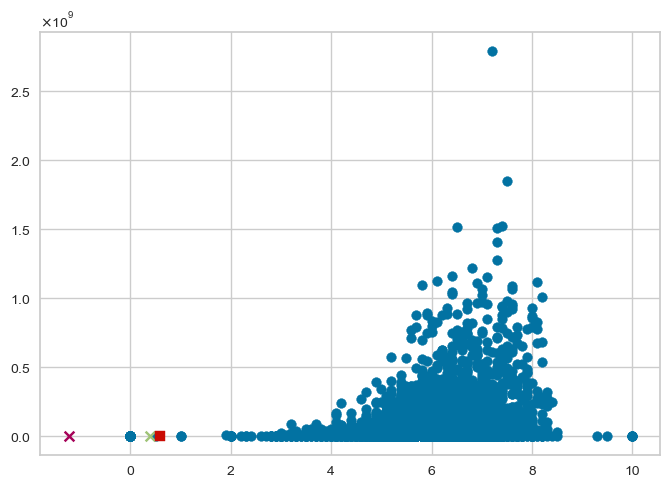

In [252]:
plt.scatter(movie_clus['vote_average'],movie_clus['revenue'])
plt.scatter(km_basic_centroid[0,0],km_basic_centroid[0,1],marker="x")
plt.scatter(km_basic_centroid[1,0],km_basic_centroid[1,1],marker="s")
plt.scatter(km_basic_centroid[2,0],km_basic_centroid[2,1],marker="x")

ax3 = plt.gca()

formatter3 = ScalarFormatter(useMathText=True)
ax3.yaxis.set_major_formatter(formatter3)

plt.show()

In [162]:
err = []
mycluster = np.arange(2,11)

for k in mycluster:
  temp_km = KMeans(n_clusters = k)
  temp_km.fit(c)
  err.append(temp_km.inertia_)

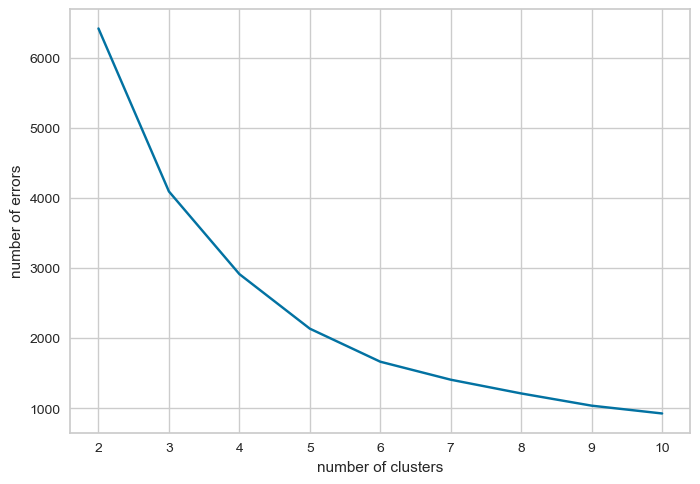

In [163]:
plt.plot(mycluster,err)
plt.xlabel("number of clusters")
plt.ylabel("number of errors")
plt.show()

In [164]:
err = []
mycluster = np.arange(2,11)

for k in mycluster:
  temp_km = KMeans(n_clusters = k)
  temp_km.fit(c)
  err.append(temp_km.inertia_)

  cluster_labels = temp_km.fit_predict(c)
  sil_avg = round(silhouette_score(x,cluster_labels)*100,0)
  print("if clusters are",k,"the performance is",sil_avg)

if clusters are 2 the performance is 0.0
if clusters are 3 the performance is -3.0
if clusters are 4 the performance is -6.0
if clusters are 5 the performance is -7.0
if clusters are 6 the performance is -8.0
if clusters are 7 the performance is -8.0
if clusters are 8 the performance is -9.0
if clusters are 9 the performance is -13.0
if clusters are 10 the performance is -14.0


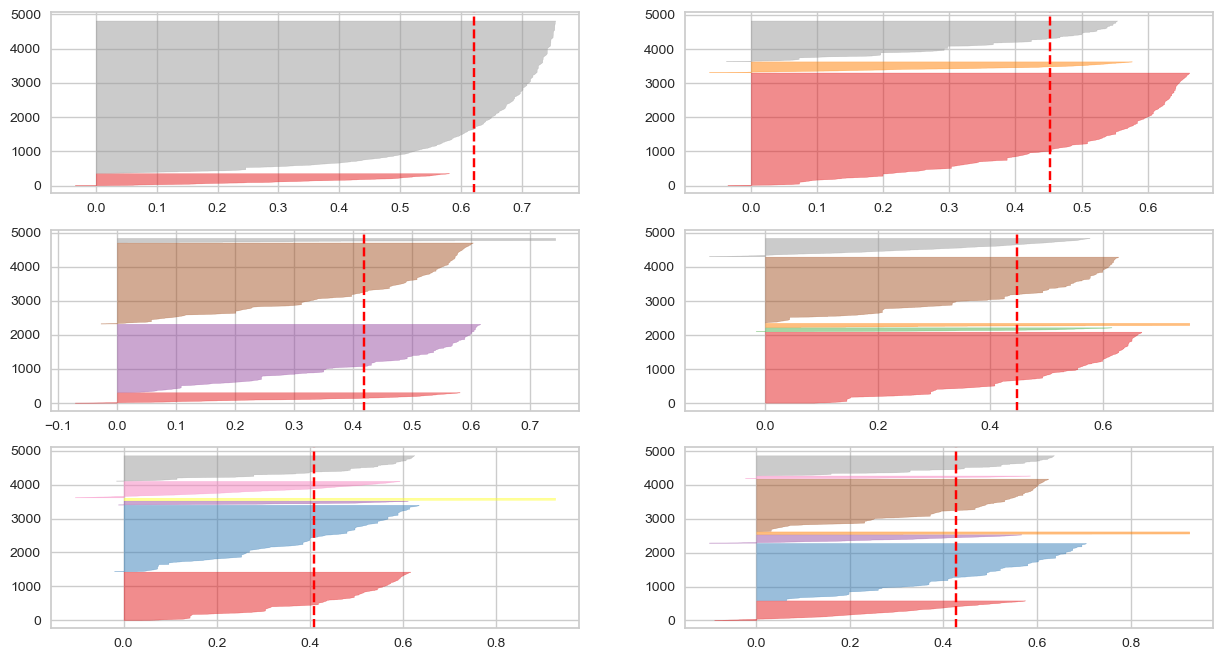

In [165]:
j = [2,3,4,5,6,7]

fig,ax = plt.subplots(3,2,figsize=(15,8))

for i in j:
  temp_kms = KMeans(n_clusters = i,random_state=42)
  q , p = divmod(i,2)
  vis = SilhouetteVisualizer(temp_kms, ax=ax[q-1][p])
  vis.fit(c)

In [166]:
#final model with 4 clusters

km_final = KMeans(n_clusters=4)
km_final.fit(c)

KMeans(n_clusters=4)

In [167]:
km_final_center = km_final.cluster_centers_
km_final_lab = km_final.labels_

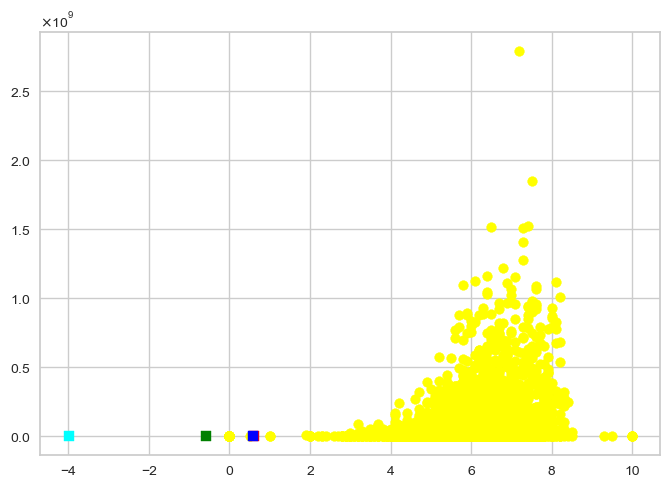

In [254]:
mycolor = ['red','blue','green','cyan']

count = 0

plt.scatter(movie_clus['vote_average'],movie_clus['revenue'],c='yellow')

for m,n in km_final.cluster_centers_:
    plt.scatter(m,n,c=mycolor[count],marker='s')
    ax4 = plt.gca()

    formatter4 = ScalarFormatter(useMathText=True)
    ax4.yaxis.set_major_formatter(formatter4)
    count = count + 1

plt.show()

**Aggloemrative Clustering**

In [169]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

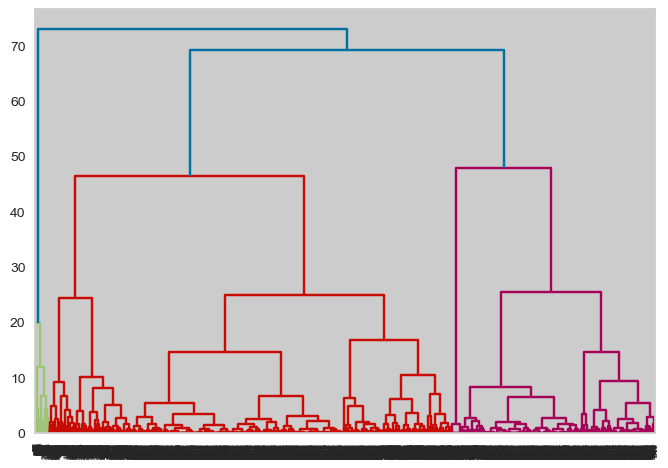

In [170]:
vis = sch.dendrogram(sch.linkage(c,method="ward"))

In [171]:
model = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")

In [172]:
cluster_no = model.fit_predict(c)

In [242]:
aglo_score = silhouette_score(c,cluster_no)

In [243]:
print('Performance of Agglomerative Clustering',aglo_score)

Performance of Agglomerative Clustering 0.38974551496558346


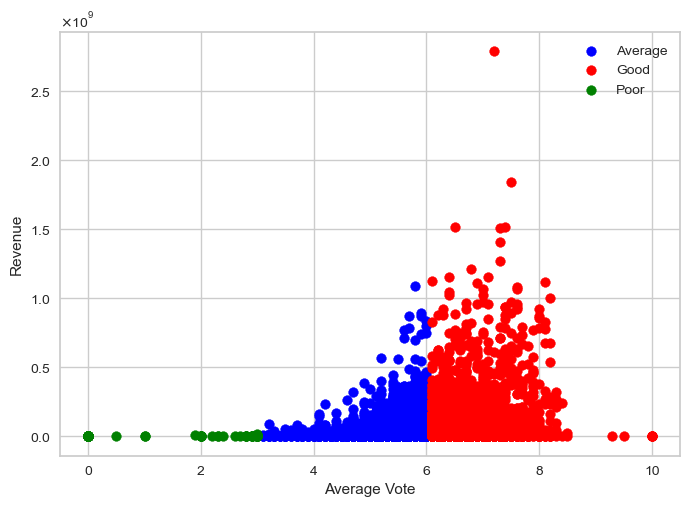

In [255]:
segments = ['Average','Good','Poor']
mycolors = ['blue','red','green']

for i in range(3):
    plt.scatter(x = movie_clus.loc[(movie_clus.rating==i),'vote_average'], \
                y = movie_clus.loc[(movie_clus.rating==i),'revenue'], \
                c = mycolors[i], label = segments[i])
    
    ax5 = plt.gca()

    formatter5 = ScalarFormatter(useMathText=True)
    ax5.yaxis.set_major_formatter(formatter5)
plt.xlabel('Average Vote')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# Time Series

In [182]:
df1.head(3)

,release_date,revenue
0,10-12-2009,2787965087
1,19-05-2007,961000000
2,26-10-2015,880674609


In [183]:
df1.dtypes

release_date    object
revenue          int64
dtype: object

In [184]:
df1['release_date'].value_counts()

01-01-2006    10
01-01-2002     8
03-09-2004     7
18-07-2013     7
25-12-2014     7
              ..
30-12-2002     1
20-08-2002     1
05-11-1987     1
11-11-2004     1
03-05-2012     1
Name: release_date, Length: 3281, dtype: int64

In [185]:
df1 = df1[ df1['release_date']!='Unknown']

In [189]:
df1.shape

(4802, 2)

In [190]:
#convert month from object to date
df1['release_date'] = pd.to_datetime(df1['release_date'],format='%d-%m-%Y')

In [191]:
df1.dtypes

release_date    datetime64[ns]
revenue                  int64
dtype: object

In [192]:
df1 = df1.sort_values(by=['release_date'])

In [193]:
df1.head(3)

,release_date,revenue
4592,1916-09-04,8394751
4661,1925-11-05,22000000
2638,1927-01-10,650422


In [194]:
#set date as index
df1 = df1.set_index('release_date')

In [195]:
df1.head(3)

,revenue
release_date,
1916-09-04,8394751
1925-11-05,22000000
1927-01-10,650422


In [196]:
df1.tail()

,revenue
release_date,
2016-09-09,0
2016-09-09,15861566
2016-09-16,0
2016-10-02,0
2017-02-03,0


In [198]:
# Replace 0 values with NaN values

#df1.replace(0, pd.NA, inplace=True)

df1[ df1['revenue'] == 0] = pd.NA

In [199]:
df1.tail()

,revenue
release_date,
2016-09-09,NaN
2016-09-09,15861566.0
2016-09-16,NaN
2016-10-02,NaN
2017-02-03,NaN


In [200]:
# Fill NaN values with mean value of column

df1.fillna(df1['revenue'].mean(), inplace=True)

In [201]:
df1.tail()

,revenue
release_date,
2016-09-09,1.170314e+08
2016-09-09,1.586157e+07
2016-09-16,1.170314e+08
2016-10-02,1.170314e+08
2017-02-03,1.170314e+08


In [202]:
#resampling the data

df1 = df1.resample('Y').mean()

In [203]:
df1.isnull().sum()

revenue    12
dtype: int64

In [204]:
df1 = df1.dropna()

In [205]:
df1.isnull().sum()

revenue    0
dtype: int64

In [206]:
type(df1)

pandas.core.frame.DataFrame

In [207]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

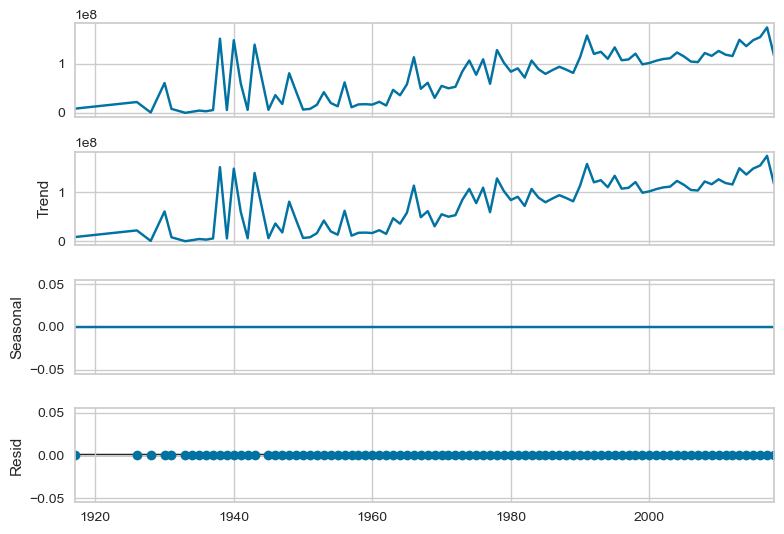

In [208]:
fig = seasonal_decompose(df1,period=1).plot()

1. Additive trend is seen.

2. No seasonality is observed.

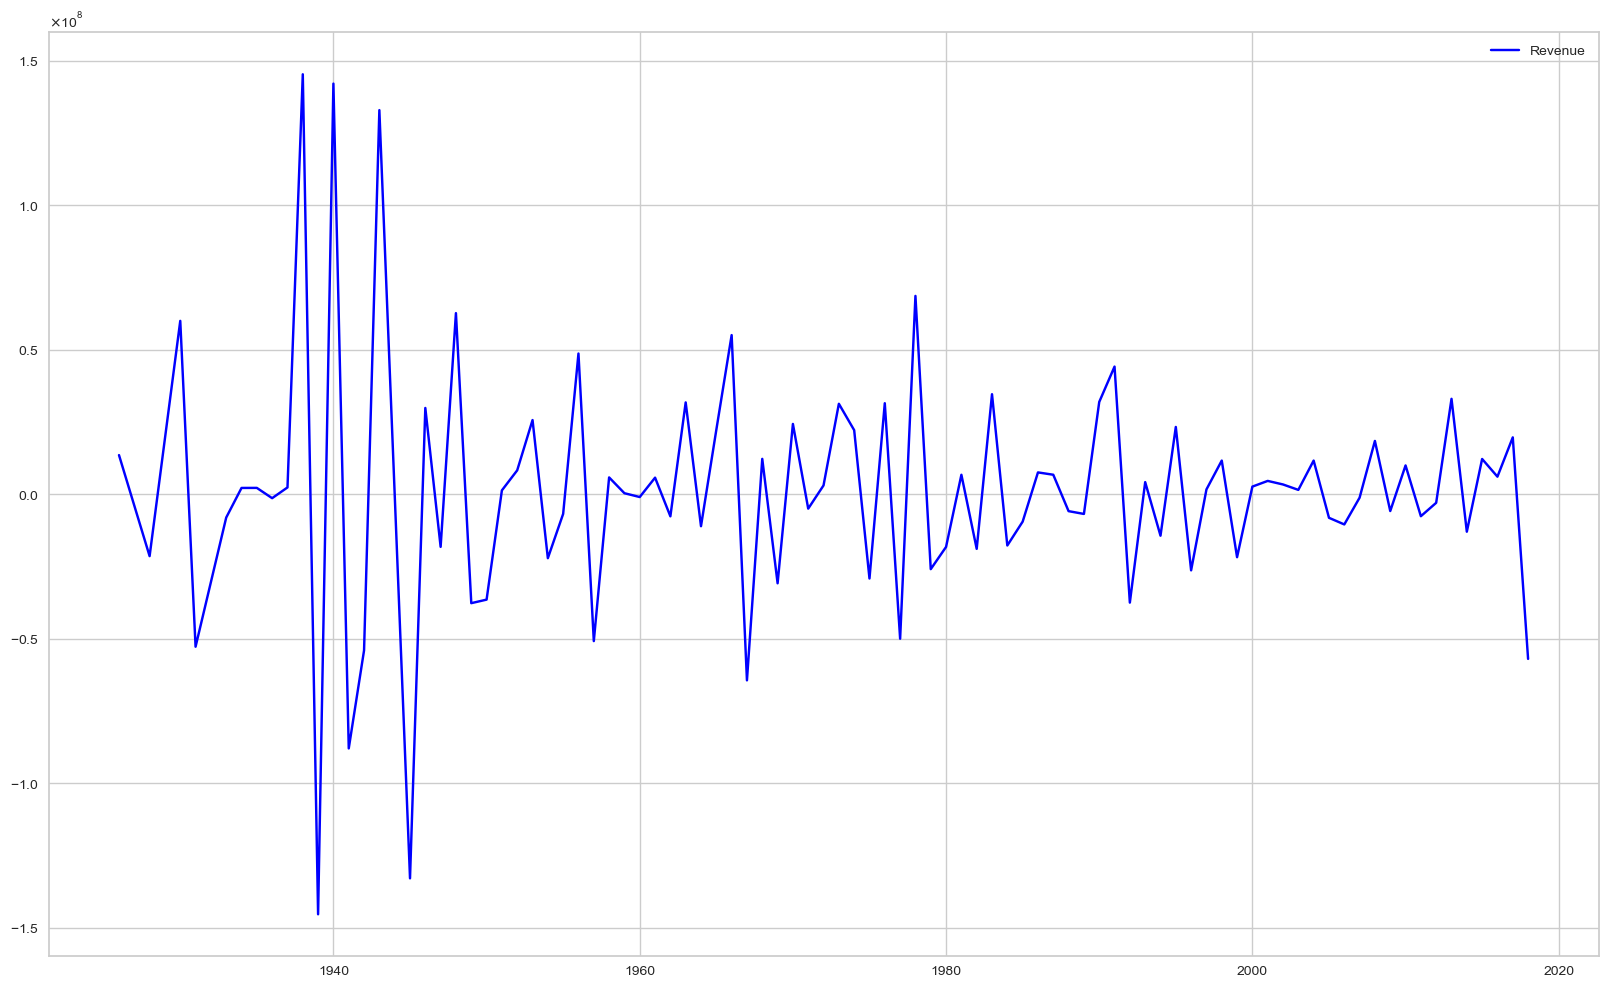

In [257]:
plt.figure(figsize=(20,12))
plt.plot(df1,label='Revenue',c='blue')

ax6 = plt.gca()
formatter6 = ScalarFormatter(useMathText=True)
ax6.yaxis.set_major_formatter(formatter6)

plt.legend();

**Smoothing**

In [210]:
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

In [211]:
s_colors = {0.0 : "lime",0.2 : "blue",0.4 : "red",0.6 : "pink",0.8 : "orange",1.0 : "green"}

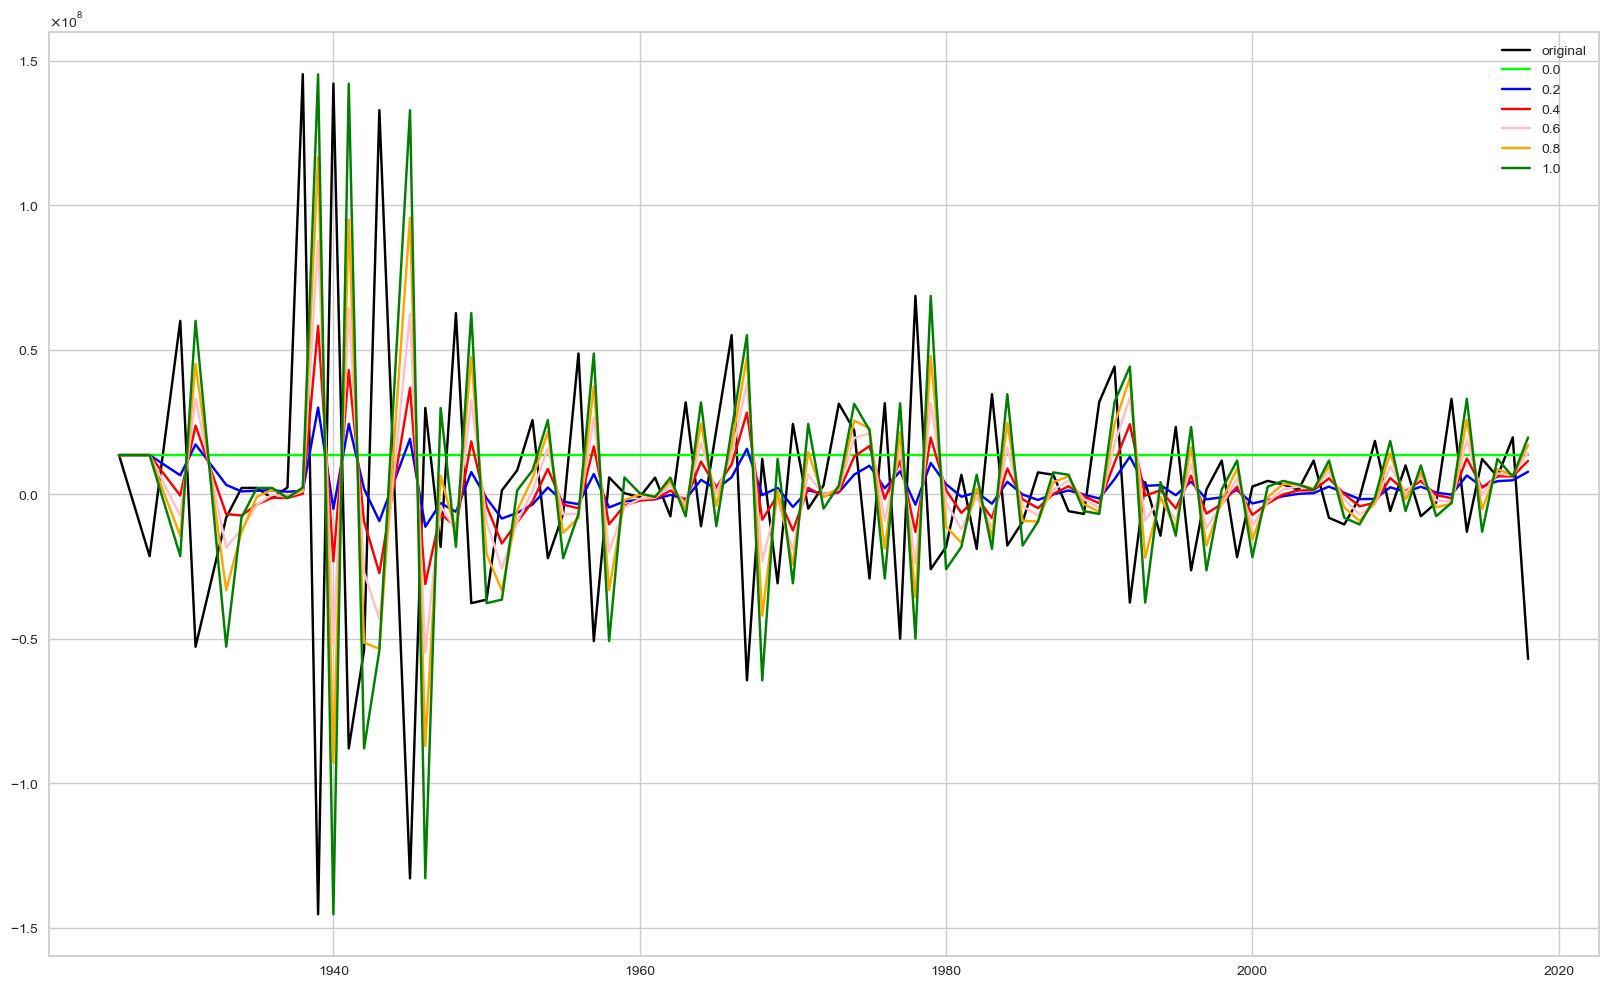

In [258]:
plt.figure(figsize = (20, 12))

plt.plot(df1, label = "original", c = "black")

for alpha, co in s_colors.items():
    model1 = SimpleExpSmoothing(df1).fit(smoothing_level = alpha)
    mysimpledf = model1.fittedvalues
    plt.plot(mysimpledf, label = alpha , color = co)
    
    ax7 = plt.gca()

    formatter7 = ScalarFormatter(useMathText=True)
    ax7.yaxis.set_major_formatter(formatter7)
    plt.legend()

plt.show()

We can take aplha as 0.8.

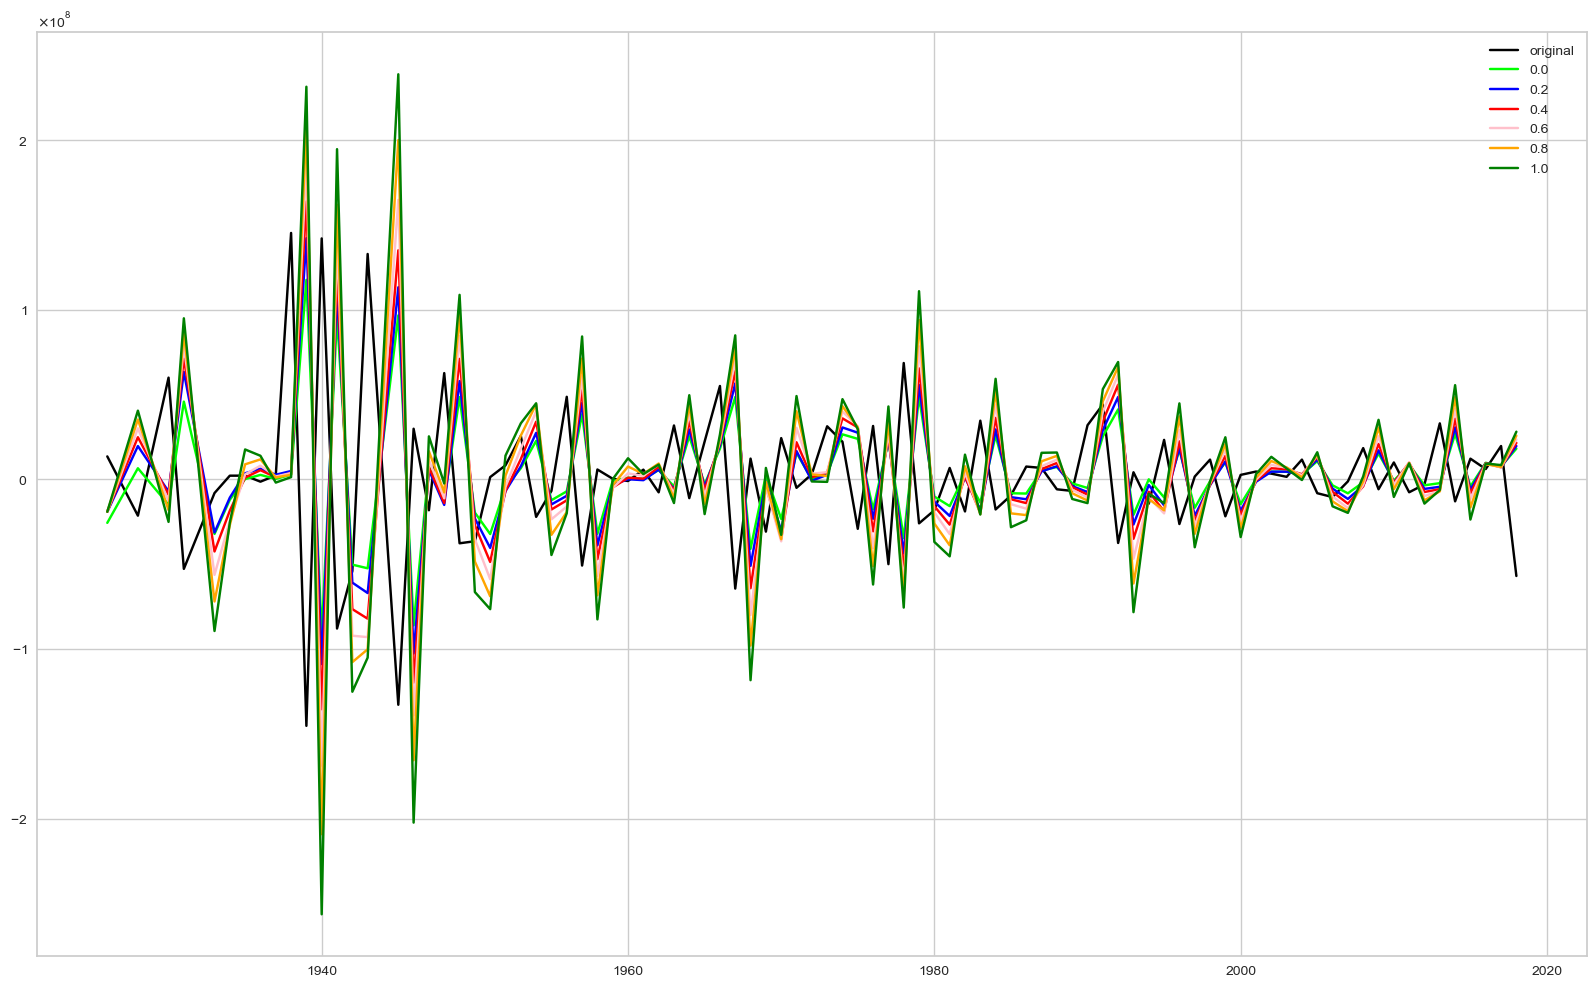

In [259]:
plt.figure(figsize=(20,12))

plt.plot(df1, label = "original", c = "black")

for beta,co in s_colors.items():
    model2 = ExponentialSmoothing(df1,trend='additive').fit(smoothing_level=0.8,smoothing_trend = beta)
    mysimpledf2 = model2.fittedvalues
    plt.plot(mysimpledf2,label=beta,color=co)
    
    ax_1 = plt.gca()
    formatter_1 = ScalarFormatter(useMathText=True)
    ax_1.yaxis.set_major_formatter(formatter_1)
    
    plt.legend()
    
plt.show()

We can take beta as 0.2

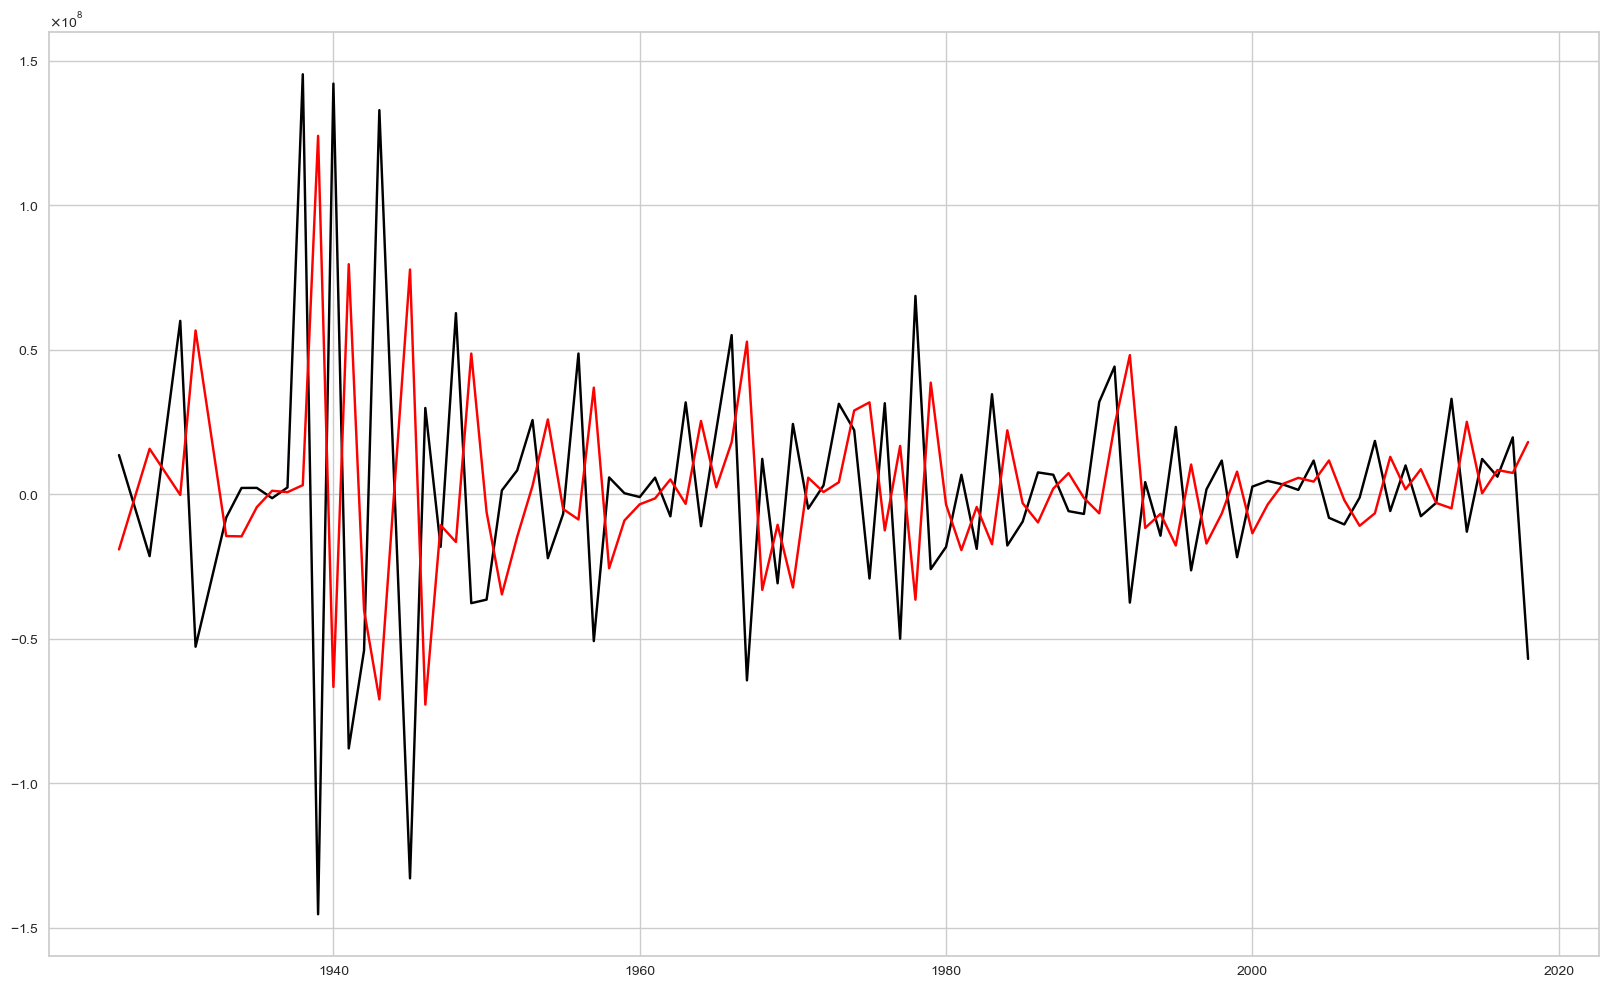

In [260]:
plt.figure(figsize=(20,12))

plt.plot(df1, label = "original", c = "black")

#final model
model = ExponentialSmoothing(df1,trend='additive').fit(smoothing_level=0.6,smoothing_trend=0.4)
mysimpledf = model.fittedvalues
plt.plot(mysimpledf,color='red',label='smothened')

ax_2 = plt.gca()
formatter_2 = ScalarFormatter(useMathText=True)
ax_2.yaxis.set_major_formatter(formatter_2)

plt.show()

**Stationarity Check**

In [215]:
from statsmodels.tsa.stattools import adfuller

In [216]:
def myadfuller(mycol):
    mypval = adfuller(mycol)[1]
    print('my p value is',mypval)
    if mypval > 0.05:
        print('data is non stationary')
    else:
        print('data is stationary')
myadfuller(mysimpledf)

my p value is 0.9691315806877393
data is non stationary


In [217]:
#making it stationary
df1 = df1.diff(1)

In [218]:
df1 = df1.dropna()

In [219]:
myadfuller(df1)

my p value is 2.8545939804870354e-06
data is stationary


In [220]:
import warnings 
warnings.filterwarnings('ignore')

In [221]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

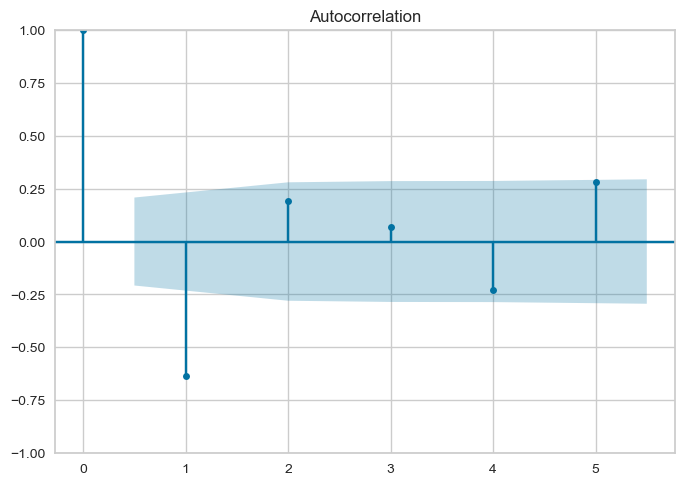

In [222]:
#plot acf

plot_acf(df1,lags=5);

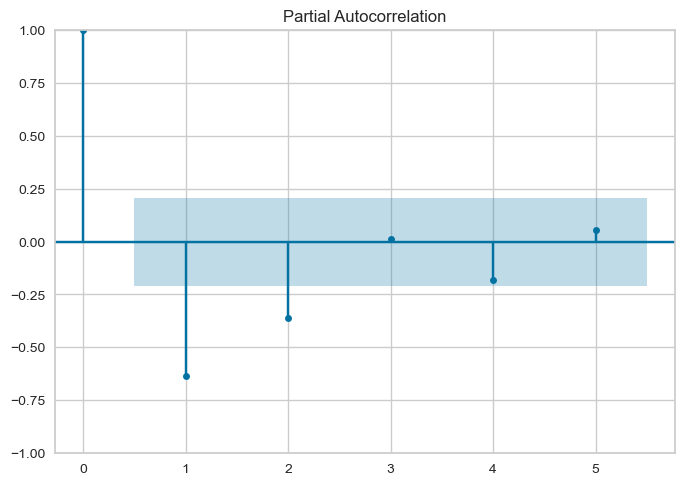

In [223]:
#plot pacf

plot_pacf(df1,lags=5);

From the above two graphs, we can take p=1 and q=2.

**Auto ARIMA**

In [224]:
from pmdarima.arima import auto_arima

In [225]:
a = auto_arima(df1,start_p=1,max_p=8,start_q=1,max_q=5,d=1,error_action='ignore',seasonal=False,supress_warning=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3320.533, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3452.941, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3380.906, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3364.364, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3450.956, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3308.915, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3336.296, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3310.906, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3304.527, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3304.607, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3312.846, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3323.297, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=i

From auto arima, p and q is 2 & 2 respectively.

In [226]:
from statsmodels.tsa.arima.model import ARIMA

In [227]:
lowest_aic = float('inf') #highest float value in python
final_p = 0
final_q = 0

In [228]:
for p in range(0,8):
    for q in range(0,8):
        temp_model = ARIMA(df1, order=(p,1,q))
        selection = temp_model.fit()
    
        if selection.aic < lowest_aic:
            lowest_aic = selection.aic
            final_p = p
            final_q = q

print('final p=',final_p,'final q=',final_q,'AIC=',lowest_aic)

final p= 3 final q= 3 AIC= 3294.6164162876694


In [229]:
#ts = ARIMA(df1,order=(final_p,1,final_q)).fit()

ts = ARIMA(df1,order=(3,1,3)).fit()

**Implementing Ljungbox Test**

In [230]:
import statsmodels.api as sm

In [231]:
def myfun(mymodel):
    ts_lj_check = sm.stats.acorr_ljungbox(mymodel.resid,lags=[5],return_df=True)
    pvalue = ts_lj_check['lb_pvalue'].values[0]
    if pvalue < 0.05:
        print('model is not good')
    else:
        print('model is good')

myfun(ts)

model is good


In [232]:
from sklearn.metrics import mean_squared_error

In [233]:
def performance_check(mymodel):
    mypred = mymodel.predict(0,len(df1)-1)
    print('predict mse',mean_squared_error(df1,mypred,squared=False))
    new_pred = mymodel.predict(0, len(df1)+10)
    myforecast = mymodel.forecast(100)
    
performance_check(ts)

predict mse 30880532.67100404


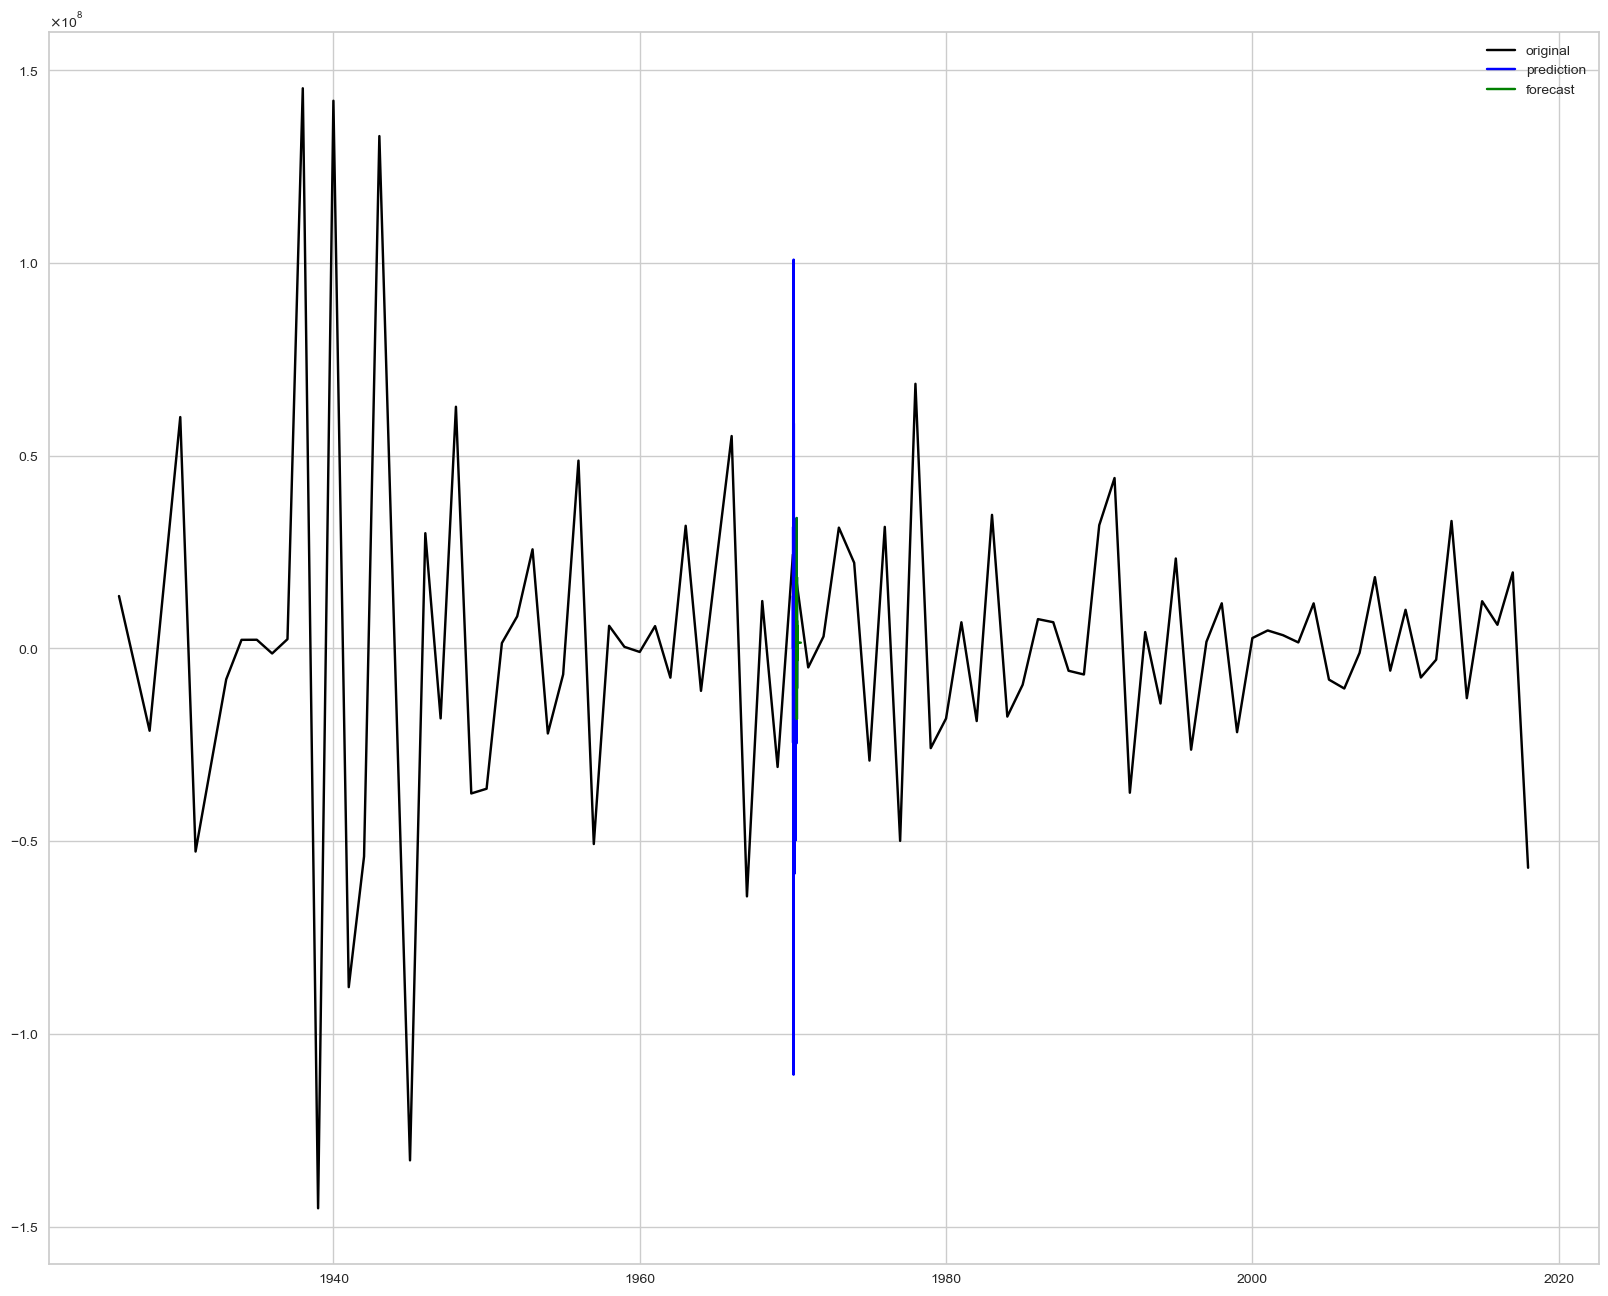

In [261]:
#plotting the graph

pred = ts.predict(0,len(df1)+50)

tsforecast = ts.forecast(100)

fig,ax = plt.subplots(1,1, figsize=(20,16))
plt.plot(df1,color='black',label='original')
plt.plot(pred,color='blue',label='prediction')
plt.plot(tsforecast,color='green',label='forecast')

ax_3 = plt.gca()
formatter_3 = ScalarFormatter(useMathText=True)
ax_3.yaxis.set_major_formatter(formatter_3)

plt.legend()
plt.show()